In [1]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from ml.utils import load_application_classification_cnn_model, load_traffic_classification_cnn_model, normalise_cm
from ml.metrics import confusion_matrix, get_classification_report
from utils import ID_TO_APP, ID_TO_TRAFFIC

In [7]:
def plot_confusion_matrix(cm, labels):
    normalised_cm = normalise_cm(cm)
    fig, ax = plt.subplots(figsize=(12, 12))
    sns.heatmap(
        data=normalised_cm, cmap='YlGnBu',
        xticklabels=labels, yticklabels=labels,
        annot=True, ax=ax, fmt='.4f'
    )
    ax.set_xlabel('Predict labels')
    ax.set_ylabel('True labels')
    fig.show()

In [8]:
if __name__ == '__main__':
    # plot dpi
    mpl.rcParams['figure.dpi'] = 300

    # model path
    application_classification_cnn_model_path = 'model/new_application_classification.cnn.model'
    traffic_classification_cnn_model_path = 'model/new_traffic_classification.cnn.model'

    # test data path
    application_classification_test_data_path = r'C:\Users\Afif\Desktop\full_train_test\application_classification\test.parquet'
    traffic_classification_test_data_path = r'C:\Users\Afif\Desktop\full_train_test\traffic_classification\test.parquet'

    application_classification_cnn = load_application_classification_cnn_model(application_classification_cnn_model_path, gpu=True)
    traffic_classification_cnn = load_traffic_classification_cnn_model(traffic_classification_cnn_model_path, gpu=True)

Resolving data files:   0%|          | 0/889 [00:00<?, ?it/s]

Found cached dataset parquet (C:/Users/Afif/Desktop/PythonScripts/GitHubs/Deep-Packet-master/huggingface/parquet/test.parquet-fbb19098fcf23238/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7)


  0%|          | 0/1 [00:00<?, ?it/s]

App model


C:\Users\Afif\AppData\Local\Temp\ipykernel_18676\454654123.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Current row: 
{'label': 'AIM Chat', 'precision': 0.9078014184397163, 'recall': 0.7930607187112764}
Current row: 
{'label': 'Email', 'precision': 0.9460414009614442, 'recall': 0.7110832534473859}
Current row: 
{'label': 'Facebook', 'precision': 0.9826255808763942, 'recall': 0.9303743626715991}
Current row: 
{'label': 'FTPS', 'precision': 0.9997777788691031, 'recall': 0.9997299099003981}
Current row: 
{'label': 'Gmail', 'precision': 0.9159707724425887, 'recall': 0.9112149532710281}
Current row: 
{'label': 'Hangouts', 'precision': 0.9822193614293309, 'recall': 0.9622917775675713}
Current row: 
{'label': 'ICQ', 'precision': 0.9396825396825397, 'recall': 0.8554913294797688}
Current row: 
{'label': 'Netflix', 'precision': 0.9998672546792725, 'recall': 0.9998918344870988}
Current row: 
{'label': 'SCP', 'precision': 0.9879429042944936, 'recall': 0.9537612802739368}
Current row: 
{'label': 'SFTP', 'precision': 0.9997577501596646, 'recall': 0.9992149497054227}
Current row: 
{'label': 'Skype', 'p

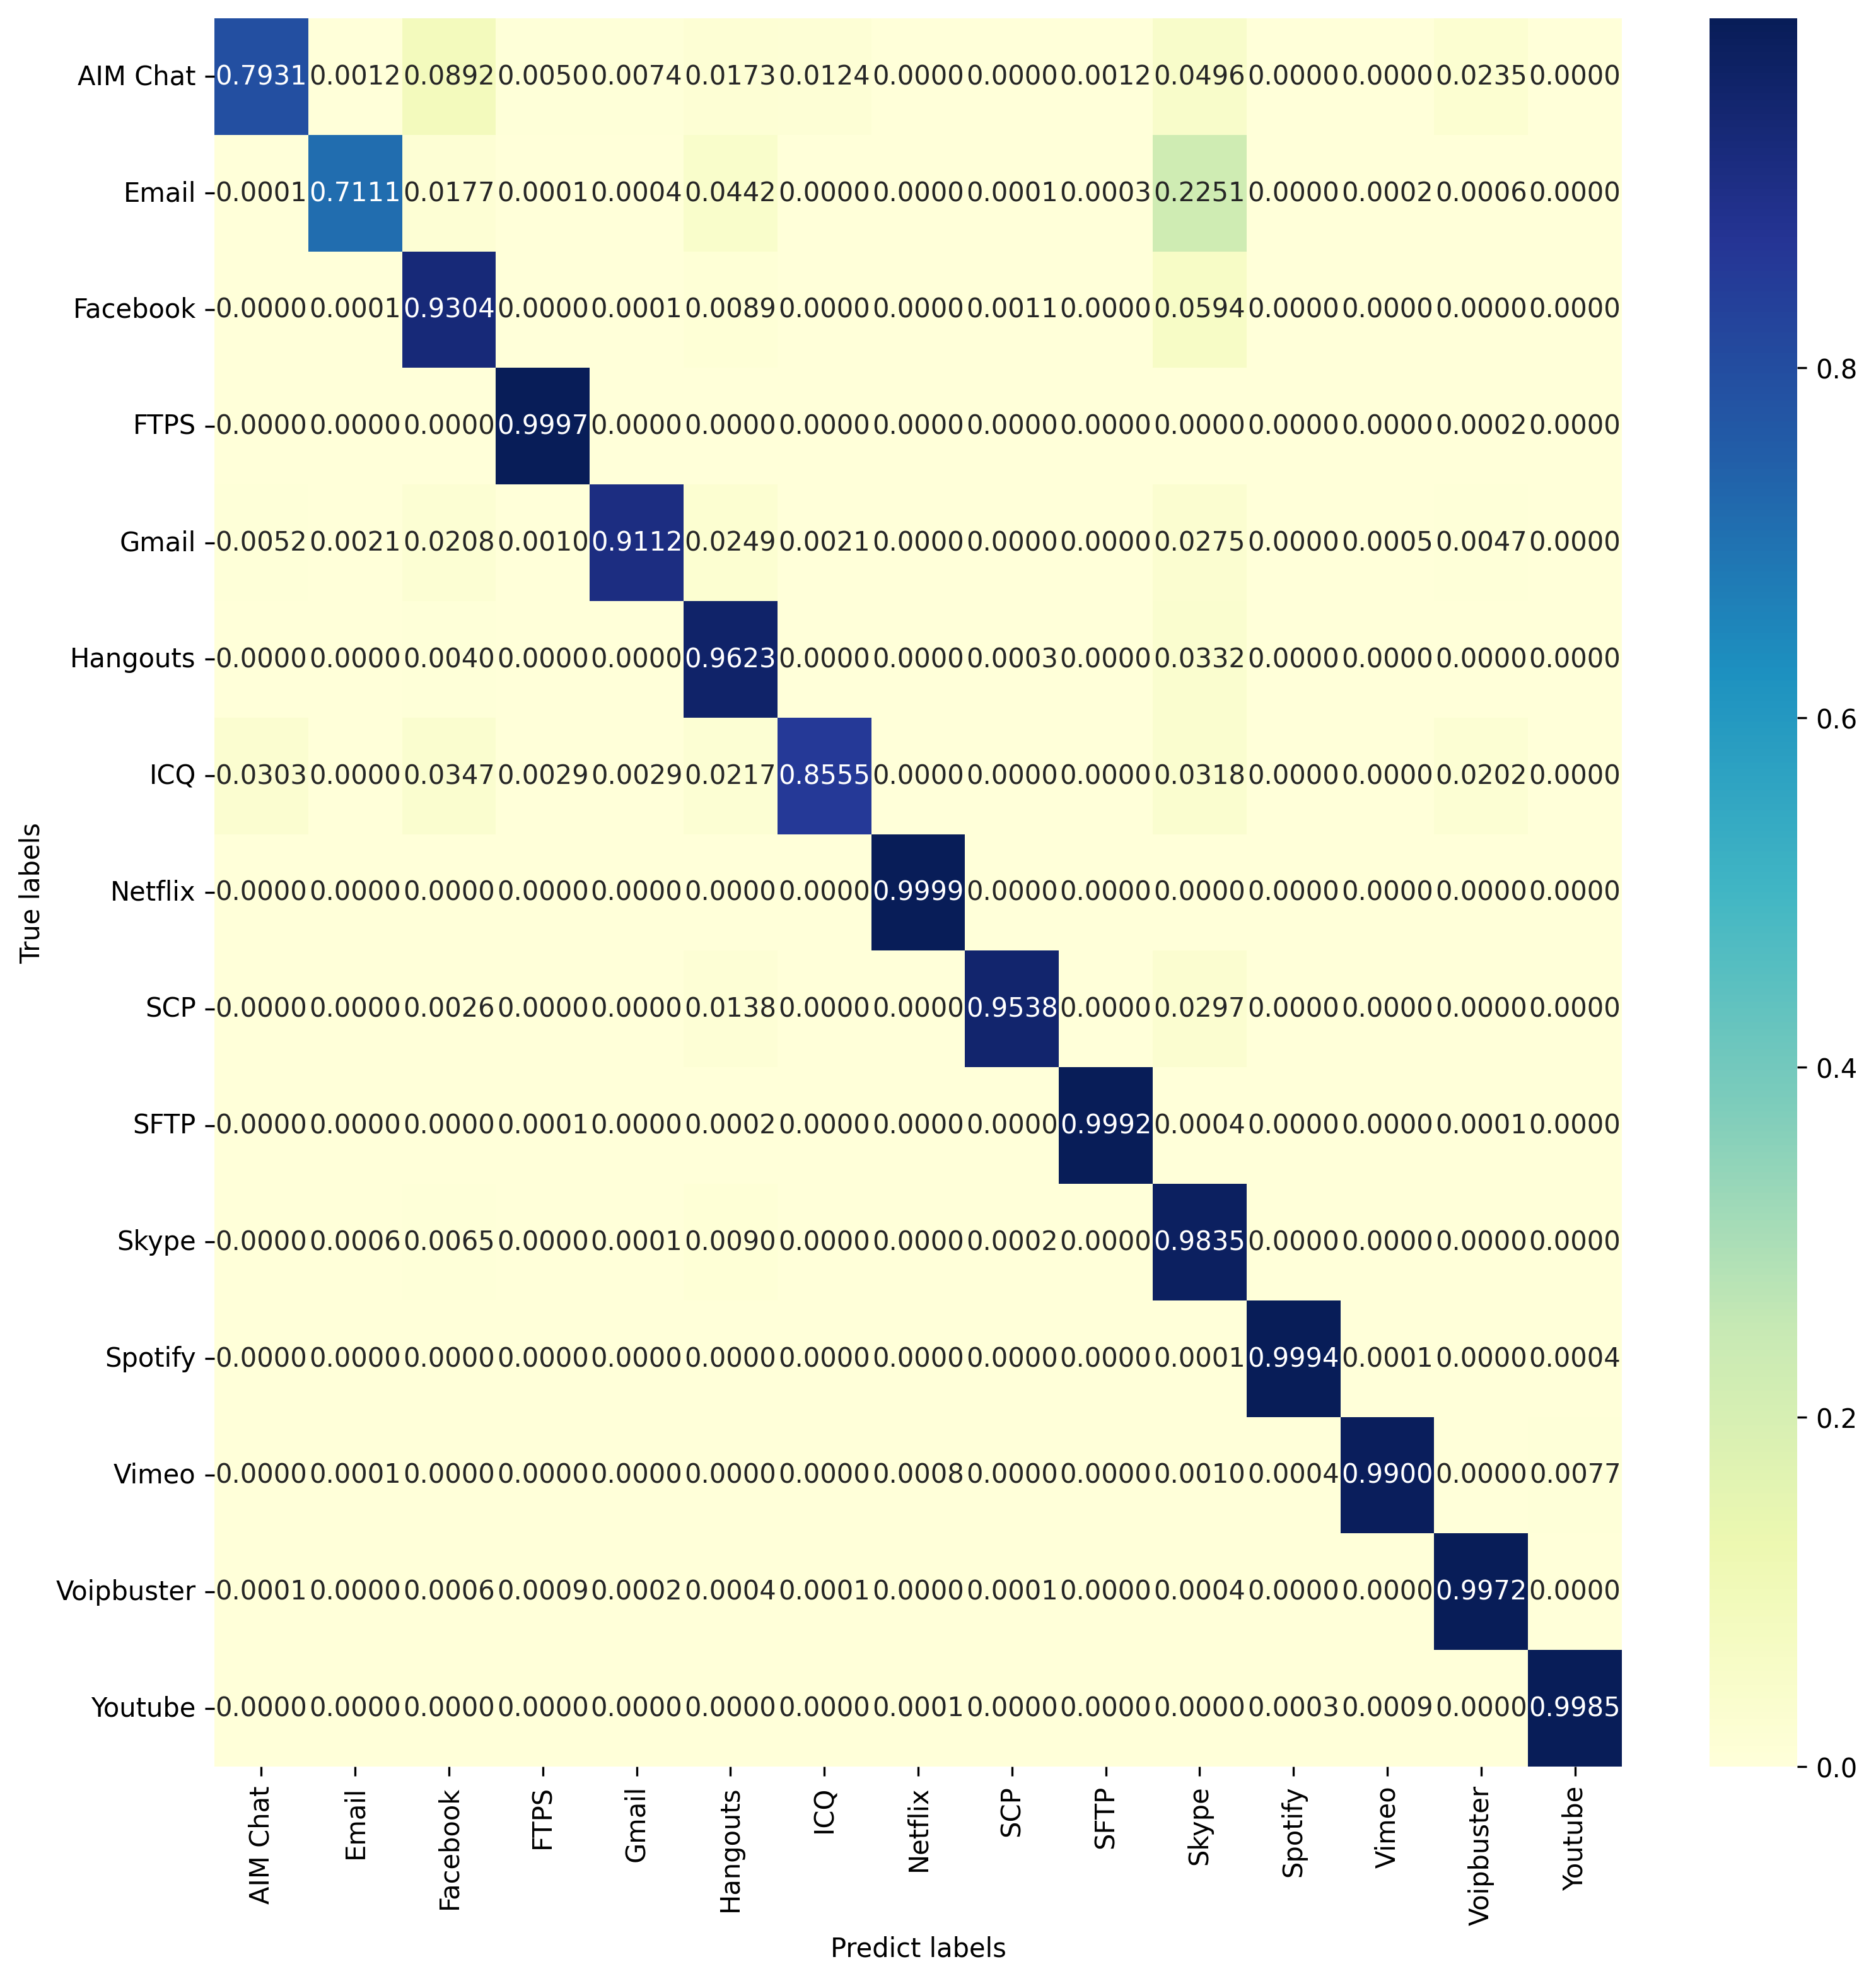

In [9]:
    app_cnn_cm = confusion_matrix(
        data_path=application_classification_test_data_path,
        model=application_classification_cnn,
        num_class=len(ID_TO_APP)
    )
    app_labels = []
    for i in sorted(list(ID_TO_APP.keys())):
        app_labels.append(ID_TO_APP[i])

    print("App model")
    plot_confusion_matrix(app_cnn_cm, app_labels)
    print(get_classification_report(app_cnn_cm, app_labels))

In [ ]:
    traffic_cnn_cm = confusion_matrix(
        data_path=traffic_classification_test_data_path,
        model=traffic_classification_cnn,
        num_class=len(ID_TO_TRAFFIC)
    )
    traffic_labels = []
    for i in sorted(list(ID_TO_TRAFFIC.keys())):
        traffic_labels.append(ID_TO_TRAFFIC[i])

    print("Traffic model")
    plot_confusion_matrix(traffic_cnn_cm, traffic_labels)
    print(get_classification_report(traffic_cnn_cm, traffic_labels))

Resolving data files:   0%|          | 0/847 [00:00<?, ?it/s]

Found cached dataset parquet (C:/Users/Afif/Desktop/PythonScripts/GitHubs/Deep-Packet-master/huggingface/parquet/test.parquet-eb525e0911b31726/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7)


  0%|          | 0/1 [00:00<?, ?it/s]